In [68]:
#import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
#Read data
df = pd.read_csv('Berea-Pc=1500psi-mac.dat',
                 skiprows=range(87),delimiter='\t')
df.head()

,Time (s),F (lb),Xa (in),Ya (in),Yb (in),Pc (psi),Pu (psi),Phyd (psi),Vhyd (Liter),Thyd (∞C),...,SigD (psi),Sig1 (psi),Pc-u (psi),Ex (E),Eya (E),Eyb (E),Ey (E),Ev (E),Ss (in),Comments
0,0.0,75.51035,0.001313,0.000063,0.000082,95.74272,0.043167,2872.424,33.65770,28.29120,...,96.14275,191.8855,95.69955,0.000630,0.000063,0.000082,0.000073,0.000776,0.015119,NaN
1,1.0,73.67073,0.001307,0.000064,0.000084,96.59563,0.275982,2872.966,33.65990,28.75129,...,93.80048,190.3961,96.31966,0.000627,0.000064,0.000084,0.000074,0.000775,0.015071,NaN
2,2.0,76.17570,0.001319,0.000064,0.000084,96.09262,1.323294,2870.648,33.66445,28.75486,...,96.98992,193.0825,94.76933,0.000633,0.000064,0.000084,0.000074,0.000781,0.015002,NaN
3,3.0,76.44942,0.001318,0.000065,0.000085,96.44537,0.466339,2873.087,33.66961,28.34182,...,97.33842,193.7838,95.97903,0.000633,0.000065,0.000085,0.000075,0.000782,0.015008,NaN
4,4.0,76.24667,0.001318,0.000066,0.000085,96.93909,0.108977,2872.904,33.66928,28.77528,...,97.08028,194.0194,96.83012,0.000633,0.000066,0.000085,0.000076,0.000784,0.014947,NaN


(a) Plot confining stress and deviatoric stress as a function of time. Plot the
stress path in a p`-q space. What kind of experiment is this?

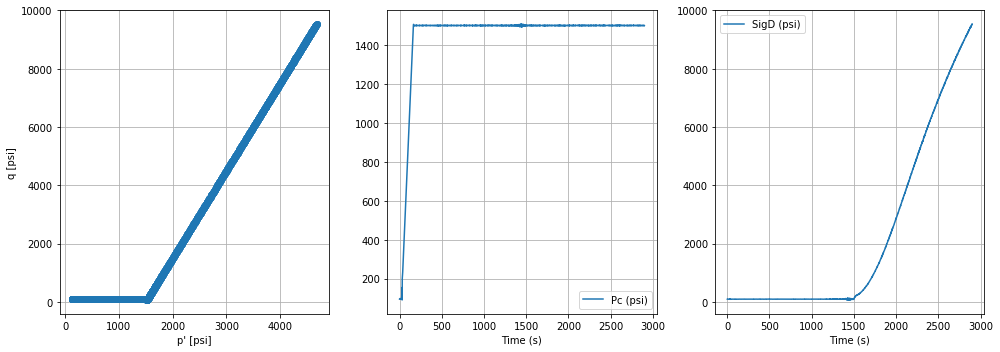

In [104]:
#Convert given field units from file to metric
lengthSample=2.084000110626*0.0254 #m
diameterSample=1*0.0254 #m
massSample=56.12/1000 #kg
volume = lengthSample*(np.pi*(diameterSample/2)**2)
density = massSample/volume #kg/m3
Pp = df['Pu (psi)']#Pore Pressure
Pc = df['Pc (psi)']#Confining Pressure
Saxial=df['Sig1 (psi)'] #Total axial stress
#Triaxial, so sig2=sig3=Pc-Pp
q = (Saxial-Pp) - (Pc-Pp)
p = ((Saxial-Pp) + 2*(Pc-Pp))/3

fig,(ax,ax2,ax3)=plt.subplots(1,3,figsize=(14,5))
ax.plot(p,q,'o')
df.plot(x='Time (s)',y='Pc (psi)',ax=ax2)
df.plot(x='Time (s)',y='SigD (psi)',ax=ax3)
ax2.grid()
ax3.grid()
ax.grid()
ax.set_xlabel("p' [psi]")
ax.set_ylabel("q [psi]")
plt.tight_layout()

## I am not sure what is meant by what type of experiment this. From the instructions, I know this is a triaxial loading test. It may have been some form of cyclical loading test.
## From the stress path, this appears to be Strain Hardening behavior and is likely on the "Wet" side of the critical state line. I believe this to be the case because the stress path increases continuously in the p'-q space, unlike a strain softening material. 

(b) Plot the axial strain, average radial strain, and volumetric strain as a function
of the deviatoric stress (this latter in the y-axis – all plots together). When
you do these plots, “zero” the strains to plot just changes respect to the
beginning of the deviatoric loading. All strain curves should start from the
axes origin. What does volumetric strain show?

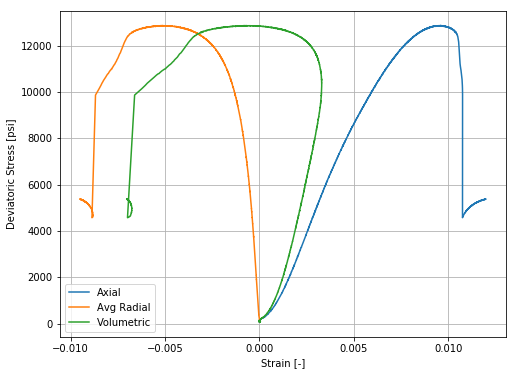

In [71]:
sigD=df['SigD (psi)'] #Deviatoric Stress
time = df['Time (s)'] #experiment time
#loading starts at around Time = 1500 s
axialStrain = np.array(df[time>1400]['Ex (E)']) #axial strain
axialStrain-=axialStrain[0]
avgRadialStrain = np.array(df[time>1400]['Ey (E)']) #average radial strain
avgRadialStrain -= avgRadialStrain[0]
volStrain = np.array(df[time>1400]['Ev (E)']) #volumetric strain
volStrain-=volStrain[0]
sigD=sigD[time>1400]
fig,ax=plt.subplots(figsize=(8,6))

ax.plot(axialStrain,sigD,label='Axial')
ax.plot(avgRadialStrain,sigD,label='Avg Radial')
ax.plot(volStrain,sigD,label='Volumetric')
ax.set_ylabel('Deviatoric Stress [psi]')
ax.set_xlabel('Strain [-]')
ax.legend()
ax.grid()

## Volumetric strain shows signs of strain hardening up to failure.

(c) Select at least 5 points from the deviatoric loading part (between 0% and
50% of peak deviatoric stress) and:

Text(0,0.5,'SigD (psi)')

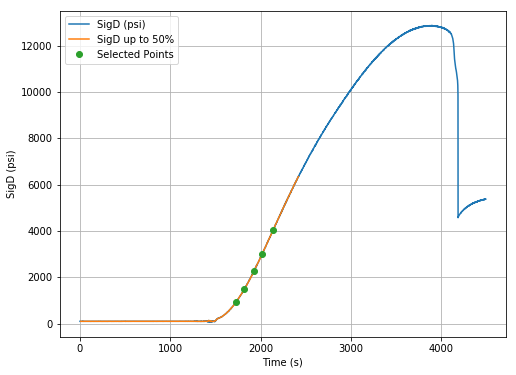

In [72]:
fig,ax =plt.subplots(figsize=(8,6))
ax.plot(df['Time (s)'],df['SigD (psi)'])
select = (df['SigD (psi)']>0) \
        & (df['SigD (psi)']<=df['SigD (psi)'].max()*0.5)\
    & (df['Time (s)'] < 4000) &(df['Comments'].notnull())
ax.plot(df[select]['Time (s)'],df[select]['SigD (psi)'],label='SigD up to 50%')
percent = np.array([70,74,78,82,87])/100
miniDF = df[select]
miniDF.reset_index(inplace=True)
idx =np.round( percent*len(miniDF)).astype('int')
miniDF = miniDF.iloc[idx]
ax.plot(miniDF['Time (s)'],miniDF['SigD (psi)'],'o',label='Selected Points')
ax.grid()
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('SigD (psi)')

In [73]:
# Let's check out which poitns we selected
miniDF.reset_index(inplace=True)
miniDF

,level_0,index,Time (s),F (lb),Xa (in),Ya (in),Yb (in),Pc (psi),Pu (psi),Phyd (psi),...,SigD (psi),Sig1 (psi),Pc-u (psi),Ex (E),Eya (E),Eyb (E),Ey (E),Ev (E),Ss (in),Comments
0,164,1728,1726.84,727.9012,0.005047,0.002822,0.002686,1499.876,-1.342396,2866.119,...,926.7925,2426.668,1501.218,0.002422,0.002822,0.002686,0.002754,0.007929,0.025945,_55P.TRC
1,173,1818,1816.84,1156.3720,0.005798,0.002778,0.002643,1500.695,-1.676406,2867.030,...,1472.3390,2973.033,1502.371,0.002782,0.002778,0.002643,0.002710,0.008203,0.027316,_58P.TRC
2,183,1928,1926.84,1788.8160,0.006714,0.002717,0.002581,1500.370,-1.673574,2865.335,...,2277.5920,3777.961,1502.043,0.003222,0.002717,0.002581,0.002649,0.008520,0.029082,_62Sx.TRC
3,192,2018,2016.84,2366.0500,0.007464,0.002658,0.002522,1500.106,0.907906,2866.994,...,3012.5480,4512.655,1499.198,0.003582,0.002658,0.002522,0.002590,0.008762,0.030238,_65Sx.TRC
4,204,2139,2137.84,3169.4220,0.008481,0.002573,0.002433,1500.793,-1.737262,2868.018,...,4035.4340,5536.227,1502.530,0.004070,0.002573,0.002433,0.002503,0.009076,0.031786,_69Sx.TRC


1. Calculate static Young modulus and Poisson ratio assuming linear
elasticity and an isotropic homogeneous material. Plot as a function of
deviatoric stress

Text(0,0.5,'Static Young Modulus (psi)')

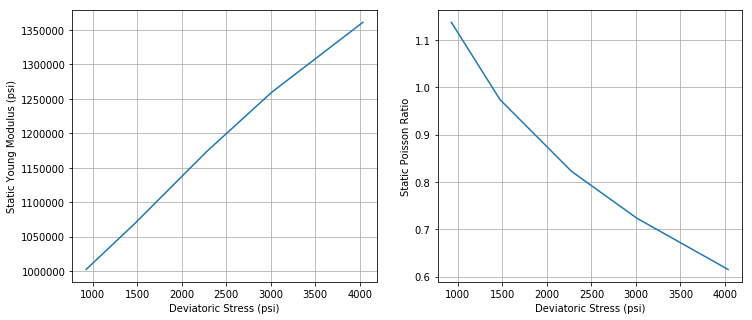

In [74]:
Pp = miniDF['Pu (psi)']#Pore Pressure
Pc = miniDF['Pc (psi)']#Confining Pressure
sig_axial=miniDF['Sig1 (psi)']-Pp #Total axial stress
sig_radial = Pc-Pp
Eaxial=miniDF['Ex (E)']
Eradial=miniDF['Ey (E)']

staticPoissonRatio = v = Eradial/Eaxial
staticYoungModulus = sig_axial/Eaxial
miniDF['E_st']=staticYoungModulus
miniDF['v_st']=staticPoissonRatio

fig,(ax,ax2) =plt.subplots(1,2,figsize=(12,5))
ax.plot(miniDF['SigD (psi)'],staticYoungModulus,label='static Young Modulus')
ax2.plot(miniDF['SigD (psi)'],staticPoissonRatio,label='poisson ratio')
ax.grid()
ax2.grid()
ax.set_xlabel('Deviatoric Stress (psi)')
ax2.set_xlabel('Deviatoric Stress (psi)')
ax2.set_ylabel('Static Poisson Ratio')
ax.set_ylabel('Static Young Modulus (psi)')


2. Calculate compression and shear wave velocities from travel times
picked from the TRC files (see figure below). The travel times should
be corrected by the endcap travel times (subtract 4.8micros from P-wave
arrival times and 6.1micros from Sy-wave arrival times)

In [75]:
#This takes my 5 points and looks at the P and Sy wave files for each point
#The travel time is estimated from the wave .TRC file and corrected as instructed.
#The results for P and Sy waves are saved for each point in a list
directory = "static-dynamic"
travelTimes= []
waveType = []
w = ['P','Sy']
for row in miniDF.iterrows():
    filename = row[1]['Comments'][1:]

    name = ""
    for f in filename:
        if f.isdigit():
            name+=f
        else:
            break
    baseName = "_"+name
    wT=[]
    for wave in w:
        if 'P' in wave:
            #P-wave file
            t_correct = 4.8
        else:
            #SyWave file
            t_correct = 6.1

        filename = os.path.join(directory,baseName+wave+".TRC")
        tdf=pd.read_csv(filename,delimiter='\t',skiprows=[0,1],header=None,names=['Time [micros]','Voltage'])
        tdf = tdf[(tdf['Time [micros]']>1)&(tdf['Voltage']>5)]
        time=np.array(tdf['Time [micros]'])      
        time=np.min(time)
        wT.append(time-t_correct)
    travelTimes.append(wT)

In [76]:
print('[Vp, Vs]')
travelTimes

[Vp, Vs]


[[15.759999999999998, 24.259999999999998],
 [15.599999999999998, 24.020000000000003],
 [15.439999999999998, 23.82],
 [15.32, 23.740000000000002],
 [15.239999999999998, 23.58]]

In [77]:
#Calculate wave velocities
velocity = []
for i in range(len(travelTimes)):
    velocity.append([lengthSample/travelTimes[i][0],lengthSample/travelTimes[i][1]])
data = np.array([velocity][0])
miniDF['Vp'] = data[:,0]*1e6 #[m/s]
miniDF['Vs'] = data[:,1]*1e6 #[m/s]

3. Calculate dynamic Young modulus and Poisson ratio assuming linear
elasticity and an isotropic homogeneous material. Plot as a function of
deviatoric stress.

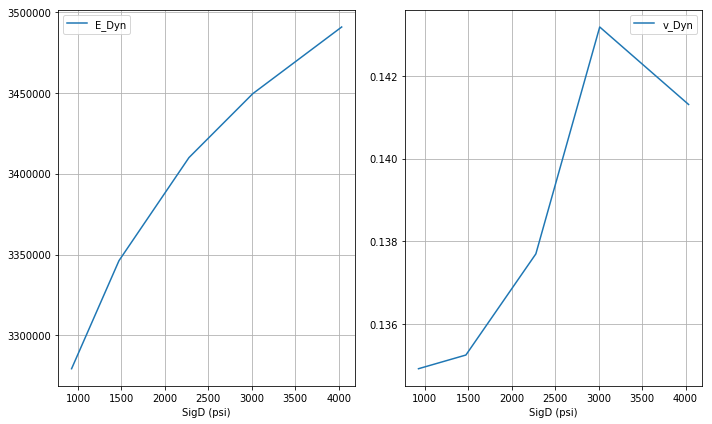

In [78]:
Vp=miniDF['Vp']
Vs=miniDF['Vs']
nom = 3*(Vp**2) - 4*(Vs**2)
den = (Vp**2) - (Vs**2)
#Perform calculation in metric units and convert back to field for comparison
miniDF['E_Dyn'] = density*(Vs**2)*(nom/den)*0.000145038 #DYNAMIC Young's Modulus [psi]
miniDF['v_Dyn']= (Vp**2 - 2*(Vs**2))/(2*(Vp**2 - Vs**2)) #DYNAMIC Poissan's ratio [-] 
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
miniDF.plot(x='SigD (psi)',y='E_Dyn',ax=ax1)
miniDF.plot(x='SigD (psi)',y='v_Dyn',ax=ax2)
ax1.grid()
ax2.grid()
plt.tight_layout()



4. Plot the static Young modulus as a function of dynamic Young
modulus. Is there a relationship between those two? What ratio
Est/Edyn would you recommend for this rock?

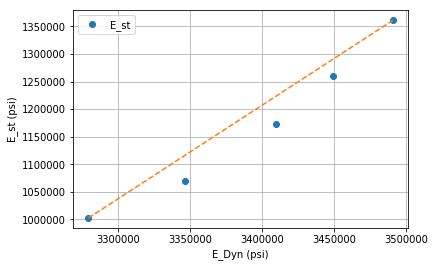

In [79]:
fig,ax=plt.subplots()
miniDF.plot(x='E_Dyn',y='E_st',ax=ax,linestyle='',marker='o')
ax.grid()
x=np.array(miniDF['E_Dyn'])
y=np.array(miniDF['E_st'])
ax.set_ylabel('E_st (psi)')
ax.set_xlabel('E_Dyn (psi)')

slope=(y[-1]-y[0])/(x[-1]-x[0])
offset=y[0]-slope*x[0]
ax.plot(x,slope*x+offset,'--')

In [80]:
print("E_st/E_Dyn: ", 1/slope)

E_st/E_Dyn:  0.5902214815595976


## There appears to be an almost linear relationship  between the static and dynamic Young's Modulus, I would recommend a ratio of ~0.59

Bonus: How does porosity change with deviatoric loading? How
would permeability change with deviatoric loading

In [ ]:
porosity = np.exp()